<a href="https://colab.research.google.com/github/benamaranermine/predict-live-birth-occurrence-before-in-vitro-fertilization-treatment/blob/main/predict_live%E2%80%91birth_with_databalancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # filter the warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC
from google.colab import drive



In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/ar-2015-2016-xlsb.xlsx'
data = pd.read_excel(file_path)

In [ ]:
data

,Patient Age at Treatment,Date patient started trying to become pregnant OR date of last pregnancy,"Total Number of Previous cycles, Both IVF and DI","Total Number of Previous treatments, Both IVF and DI at clinic",Total Number of Previous IVF cycles,Total Number of Previous DI cycles,"Total number of previous pregnancies, Both IVF and DI",Total number of IVF pregnancies,Total number of DI pregnancies,Total number of live births - conceived through IVF or DI,...,Heart Three Birth Weight,Heart Three Sex,Heart Three Delivery Date,Heart Three Birth Congenital Abnormalities,Heart Four Weeks Gestation,Heart Four Birth Outcome,Heart Four Birth Weight,Heart Four Sex,Heart Four Delivery Date,Heart Four Birth Congenital Abnormalities
0,40-42,NaN,2,2,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45-50,NaN,3,3,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-37,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18 - 34,NaN,2,2,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 - 34,NaN,5,5,5,0,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,35-37,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65531,18 - 34,NaN,1,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65532,35-37,NaN,3,3,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65533,18 - 34,NaN,1,1,1,0,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in data:
    print(f"{col} has : {data[col].unique()} unique values\n")


Patient Age at Treatment has : ['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39' '999'] unique values

Date patient started trying to become pregnant OR date of last pregnancy has : [nan 13. 11. 10. 15. 16. 17. 14. 19. 12. 18. 20.  6.  9.  5.  8.  3.] unique values

Total Number of Previous cycles, Both IVF and DI has : ['2' '3' '0' '5' '>=5' '1' '4'] unique values

Total Number of Previous treatments, Both IVF and DI at clinic has : ['2' '3' '0' '5' '1' '>=5' '4'] unique values

Total Number of Previous IVF cycles has : ['2' '3' '0' '5' '4' '1' '>=5'] unique values

Total Number of Previous DI cycles has : ['0' '3' '>=5' '1' '2' '4' '5'] unique values

Total number of previous pregnancies, Both IVF and DI has : ['0' '1' '2' '4' '3' '5' '>=5'] unique values

Total number of IVF pregnancies has : ['0' '1' '2' '4' '3' '5' '>=5'] unique values

Total number of DI pregnancies has : [0 1 3 2 4] unique values

Total number of live births - conceived through IVF or DI has : [0 1 2 3 5 4] uni

In [4]:
selected_features = [
    "Patient Age at Treatment",
    "Total Number of Previous IVF cycles",
    "Total number of IVF pregnancies",
    "Total number of live births - conceived through IVF",
    "Type of Infertility - Female Primary",
    "Type of Infertility - Female Secondary",
    "Type of Infertility - Male Primary",
    "Type of Infertility - Male Secondary",
    "Type of Infertility -Couple Primary",
    "Type of Infertility -Couple Secondary",
    "Cause  of Infertility - Tubal disease",
    "Cause of Infertility - Ovulatory Disorder",
    "Cause of Infertility - Male Factor",
    "Cause of Infertility - Patient Unexplained",
    "Cause of Infertility - Endometriosis",
    "Cause of Infertility - Cervical factors",
    "Cause of Infertility - Female Factors",
    "Cause of Infertility - Partner Sperm Concentration",
    "Cause of Infertility -  Partner Sperm Morphology",
    "Causes of Infertility - Partner Sperm Motility",
    "Cause of Infertility -  Partner Sperm Immunological factors",
    "Stimulation used",
    "Egg Source",
    "Sperm From",
    "Fresh Cycle",
    "Frozen Cycle",
    "Eggs Thawed",
    "Fresh Eggs Collected",
    "Eggs Mixed With Partner Sperm",
    "Embryos Transfered",
    "Number of Live Births"
]
# Keep only the selected features
df_selected = data[selected_features]



In [5]:
# Keep only the selected features
df_selected = data[selected_features]




def convert_to_binary_classification(df):
    # Copy the original DataFrame
    df_selected = df.copy()


    # Set values greater than 1 to 1, and the rest to 0
    df_selected["Number of Live Births"] = df_selected["Number of Live Births"].apply(lambda x: 1 if x >= 1 else 0)


    return df_selected


# Assume `df` is your original DataFrame


# Convert the "Live-birth Occurrence" column to binary classification
df_selected = convert_to_binary_classification(df_selected)


# Display the result
print(df_selected["Number of Live Births"])





0        1
1        0
2        0
3        0
4        0
        ..
65530    1
65531    0
65532    1
65533    1
65534    0
Name: Number of Live Births, Length: 65535, dtype: int64


In [ ]:
for col in df_selected:
    print(f"{col} has : {df_selected[col].unique()} unique values\n")

Patient Age at Treatment has : ['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39' '999'] unique values

Total Number of Previous IVF cycles has : ['2' '3' '0' '5' '4' '1' '>=5'] unique values

Total number of IVF pregnancies has : ['0' '1' '2' '4' '3' '5' '>=5'] unique values

Total number of live births - conceived through IVF has : [0 1 2 3 5 4] unique values

Type of Infertility - Female Primary has : [0 1] unique values

Type of Infertility - Female Secondary has : [0 1] unique values

Type of Infertility - Male Primary has : [0 1] unique values

Type of Infertility - Male Secondary has : [0 1] unique values

Type of Infertility -Couple Primary has : [0 1] unique values

Type of Infertility -Couple Secondary has : [0 1] unique values

Cause  of Infertility - Tubal disease has : [0 1] unique values

Cause of Infertility - Ovulatory Disorder has : [0 1] unique values

Cause of Infertility - Male Factor has : [0 1] unique values

Cause of Infertility - Patient Unexplained has : [1 0] 

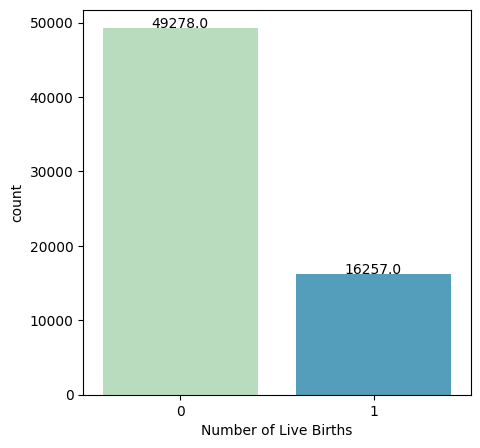

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df_selected["Number of Live Births"], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Live birth occurrence', round(df_selected["Number of Live Births"].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Live birth occurrence', round(df_selected["Number of Live Births"].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Live birth occurrence 75.19 % of the dataset
Live birth occurrence 24.81 % of the dataset


In [6]:
df_selected.rename(columns={"Number of Live Births": "Live birth occurrence"}, inplace=True)


In [7]:
# Delete rows with Patient Age at Treatment = 999
df = df_selected[df_selected["Patient Age at Treatment"] != '999']


In [8]:
def convert_age_range(age_range):
    if age_range == "18 - 34":
        return 0
    elif age_range ==  "35-37":
        return 1
    elif age_range == "38-39":
        return 2
    elif age_range == "40-42":
        return 3
    elif age_range ==  "43-44":
        return 4
    elif age_range ==  "45-50":
        return 5
    else:
        return None


In [9]:
# Assume `df` is your DataFrame with the "Age Range" column

# Apply the conversion function to the "Age Range" column
df["Patient Age at Treatment"] = df["Patient Age at Treatment"].apply(convert_age_range).astype('Int64')



In [ ]:
for col in df:
    print(f"{col} has : {df[col].unique()} unique values\n")

Patient Age at Treatment has : <IntegerArray>
[3, 5, 1, 0, 4, 2]
Length: 6, dtype: Int64 unique values

Total Number of Previous IVF cycles has : ['2' '3' '0' '5' '4' '1' '>=5'] unique values

Total number of IVF pregnancies has : ['0' '1' '2' '4' '3' '5' '>=5'] unique values

Total number of live births - conceived through IVF has : [0 1 2 3 5 4] unique values

Type of Infertility - Female Primary has : [0 1] unique values

Type of Infertility - Female Secondary has : [0 1] unique values

Type of Infertility - Male Primary has : [0 1] unique values

Type of Infertility - Male Secondary has : [0 1] unique values

Type of Infertility -Couple Primary has : [0 1] unique values

Type of Infertility -Couple Secondary has : [0 1] unique values

Cause  of Infertility - Tubal disease has : [0 1] unique values

Cause of Infertility - Ovulatory Disorder has : [0 1] unique values

Cause of Infertility - Male Factor has : [0 1] unique values

Cause of Infertility - Patient Unexplained has : [1 0] 

In [ ]:
df.isnull().sum()


Patient Age at Treatment                                       0
Total Number of Previous IVF cycles                            0
Total number of IVF pregnancies                                0
Total number of live births - conceived through IVF            0
Type of Infertility - Female Primary                           0
Type of Infertility - Female Secondary                         0
Type of Infertility - Male Primary                             0
Type of Infertility - Male Secondary                           0
Type of Infertility -Couple Primary                            0
Type of Infertility -Couple Secondary                          0
Cause  of Infertility - Tubal disease                          0
Cause of Infertility - Ovulatory Disorder                      0
Cause of Infertility - Male Factor                             0
Cause of Infertility - Patient Unexplained                     0
Cause of Infertility - Endometriosis                           0
Cause of Infertility - Ce

In [ ]:
# Drop rows with NaN values
#df.dropna(inplace=True)




In [ ]:
#X = df.loc[:, df.columns != 'Live birth occurrence']
#X = X.apply(pd.to_numeric, errors='coerce')
#df1=X.fillna(X.median())


In [ ]:
#Y = df['Live birth occurrence']

In [ ]:
#df=pd.concat([df1, Y], axis=1, join='inner')


In [10]:
df.loc[df['Total Number of Previous IVF cycles'] == '>=5', 'Total Number of Previous IVF cycles'] = 6
df['Total Number of Previous IVF cycles'] = df['Total Number of Previous IVF cycles'].astype(int)


In [11]:
df.loc[df['Fresh Eggs Collected'] == '> 50', 'Fresh Eggs Collected'] = 60
df['Fresh Eggs Collected'] = df['Fresh Eggs Collected'].astype(int)

In [12]:
df.loc[df['Eggs Mixed With Partner Sperm'] == '> 50', 'Eggs Mixed With Partner Sperm'] = 60
df['Eggs Mixed With Partner Sperm'] = df['Eggs Mixed With Partner Sperm'].astype(int)

In [13]:
df.loc[df['Total number of IVF pregnancies'] == '>=5', 'Total number of IVF pregnancies'] = 6
df['Total number of IVF pregnancies'] = df['Total number of IVF pregnancies'].astype(int)


In [14]:
df=df.drop(['Egg Source','Sperm From','Cause of Infertility -  Partner Sperm Immunological factors','Stimulation used'], axis=1)

In [15]:
df=df.drop(['Cause of Infertility - Female Factors'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64442 entries, 0 to 65534
Data columns (total 26 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   Patient Age at Treatment                             64442 non-null  Int64
 1   Total Number of Previous IVF cycles                  64442 non-null  int64
 2   Total number of IVF pregnancies                      64442 non-null  int64
 3   Total number of live births - conceived through IVF  64442 non-null  int64
 4   Type of Infertility - Female Primary                 64442 non-null  int64
 5   Type of Infertility - Female Secondary               64442 non-null  int64
 6   Type of Infertility - Male Primary                   64442 non-null  int64
 7   Type of Infertility - Male Secondary                 64442 non-null  int64
 8   Type of Infertility -Couple Primary                  64442 non-null  int64
 9   Type o

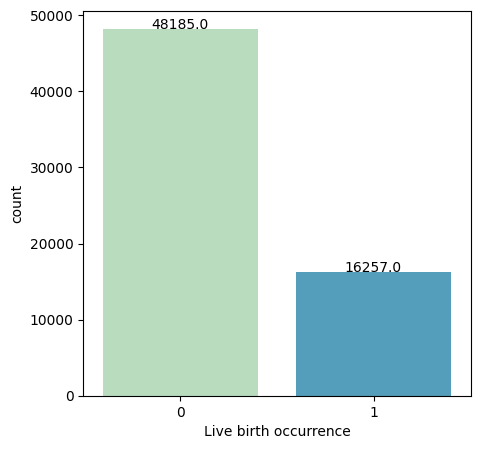

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df["Live birth occurrence"], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [16]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df[df['Live birth occurrence'] == 0]
df_minority = df[df['Live birth occurrence'] == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # Set to False for undersampling
                                   n_samples=16257,  # Specify the desired number of samples
                                   random_state=42)  # Set a random state for reproducibility

# Combine the downsampled majority class with the minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the DataFrame if needed
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)


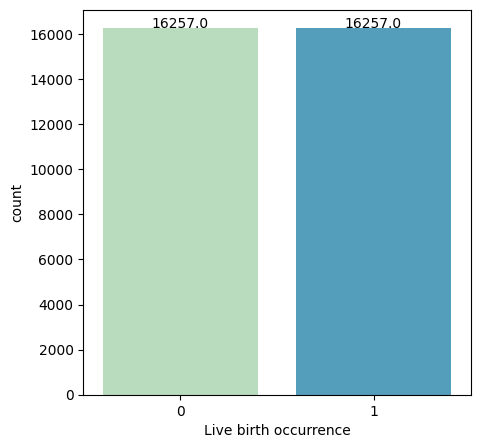

In [17]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df_downsampled["Live birth occurrence"], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [18]:
X = df_downsampled.drop(['Live birth occurrence'], axis=1)


In [19]:
Y = df_downsampled['Live birth occurrence']


In [ ]:
#df_downsampled = df_downsampled.loc[(df_downsampled['Patient Age at Treatment'] <= 3)]


#Scale Data

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = X.columns
# Scale the features
scaled_features = scaler.fit_transform(X)

# Create new DataFrames for scaled features
X = pd.DataFrame(scaled_features, columns=cols)


In [21]:
import statsmodels.formula.api as smf

# Fit logistic regression model
model = smf.logit('Y ~ X', data=df_downsampled).fit()

# Extract odds ratios and 95% CI
params = model.params
conf = model.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']

# Print odds ratios
print(conf)

         Current function value: 0.628939
         Iterations: 35
               Lower CI      Upper CI         OR
Intercept     -1.406635      0.208414  -0.599111
X[0]          -1.701944     -1.500165  -1.601054
X[1]          -0.717811     -0.489753  -0.603782
X[2]           0.486271      1.657153   1.071712
X[3]          -0.025328      0.901903   0.438287
X[4]          -2.278688      3.678382   0.699847
X[5]          -2.011375      4.370107   1.179366
X[6]                NaN           NaN  -0.761932
X[7]                NaN           NaN  -0.184534
X[8]                NaN           NaN  -0.315697
X[9]                NaN           NaN  -0.630769
X[10]         -0.140896      0.016269  -0.062314
X[11]         -0.033654      0.114724   0.040535
X[12]          0.070252      0.185069   0.127661
X[13]         -0.005359      0.120781   0.057711
X[14]         -0.117336      0.085230  -0.016053
X[15]      -4885.212899   4857.047906 -14.082496
X[16]         -2.730834      1.043270  -0.843782
X[1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

# Create logistic regression
logreg = LogisticRegression()

# Fit model
logreg.fit(X, Y)

# Get coefficients
coeffs = logreg.coef_[0]

# Zip features and coefficients
coef_dict = dict(zip(list(X.columns), coeffs))

# Print coefficients
print('Feature coefficients:')
for feat, coef in coef_dict.items():
    print(feat, ':', coef)

# Print intercept
print('Intercept:', logreg.intercept_)

# Evaluate model
y_preds = logreg.predict(X)
print('Accuracy:', metrics.accuracy_score(Y, y_preds))

Feature coefficients:
Patient Age at Treatment : -1.5858120978997647
Total Number of Previous IVF cycles : -0.5931482962519887
Total number of IVF pregnancies : 1.000556705879729
Total number of live births - conceived through IVF : 0.46283226147065293
Type of Infertility - Female Primary : -0.08312808863904901
Type of Infertility - Female Secondary : 0.25337217253076955
Type of Infertility - Male Primary : -0.290041524244582
Type of Infertility - Male Secondary : 0.1777447275874859
Type of Infertility -Couple Primary : 0.03737334627430674
Type of Infertility -Couple Secondary : -0.14967014293139944
Cause  of Infertility - Tubal disease : -0.05815492752490742
Cause of Infertility - Ovulatory Disorder : 0.043785882241009516
Cause of Infertility - Male Factor : 0.1280206522245383
Cause of Infertility - Patient Unexplained : 0.06089184127950967
Cause of Infertility - Endometriosis : -0.014395331596503646
Cause of Infertility - Cervical factors : -0.14136624832389788
Cause of Infertility -

In [23]:
# List of columns (excluding 'Patient age at treatment' and 'Live birth occurrence')
probability_columns = ['Patient Age at Treatment',
 'Total Number of Previous IVF cycles',
 'Total number of IVF pregnancies',
 'Total number of live births - conceived through IVF',
 'Type of Infertility - Female Primary',
 'Type of Infertility - Female Secondary',
 'Type of Infertility - Male Primary',
 'Type of Infertility - Male Secondary',
 'Type of Infertility -Couple Primary',
 'Type of Infertility -Couple Secondary',
 'Cause  of Infertility - Tubal disease',
 'Cause of Infertility - Ovulatory Disorder',
 'Cause of Infertility - Male Factor',
 'Cause of Infertility - Patient Unexplained',
 'Cause of Infertility - Endometriosis',
 'Cause of Infertility - Cervical factors',
 'Cause of Infertility - Partner Sperm Concentration',
 'Cause of Infertility -  Partner Sperm Morphology',
 'Causes of Infertility - Partner Sperm Motility',
 'Fresh Cycle',
 'Frozen Cycle',
 'Eggs Thawed',
 'Fresh Eggs Collected',
 'Eggs Mixed With Partner Sperm',
 'Embryos Transfered',
 ]

# Calculate the probability of live birth occurrence (success=1) for each column
for col in probability_columns:
    success_probabilities = df_downsampled[df_downsampled['Live birth occurrence'] == 1].groupby(col).size()
    total_occurrences = df_downsampled.groupby(col).size()
    live_birth_occurrence_probability = (success_probabilities / total_occurrences) * 100

    print(f"Probability of live birth occurrence (success=1) based on {col}:")
    print(live_birth_occurrence_probability)
    print("\n")

Probability of live birth occurrence (success=1) based on Patient Age at Treatment:
Patient Age at Treatment
0    57.519591
1    52.056221
2    43.615766
3    34.561049
4    26.492851
5    36.993464
dtype: float64


Probability of live birth occurrence (success=1) based on Total Number of Previous IVF cycles:
Total Number of Previous IVF cycles
0    50.114960
1    51.566918
2    50.389228
3    49.450118
4    46.418338
5    47.407407
6    42.100193
dtype: float64


Probability of live birth occurrence (success=1) based on Total number of IVF pregnancies:
Total number of IVF pregnancies
0     49.328408
1     53.131233
2     54.090150
3     52.380952
4     23.076923
5           NaN
6    100.000000
dtype: float64


Probability of live birth occurrence (success=1) based on Total number of live births - conceived through IVF:
Total number of live births - conceived through IVF
0     49.418749
1     53.565386
2     55.656109
3     61.538462
4    100.000000
dtype: float64


Probability of live

In [24]:
X.shape

(32514, 25)

In [25]:
Y.shape

(32514,)

In [ ]:
new_df=pd.concat([X, Y], axis=1, join='inner')


#Split Data into test and train

In [26]:
# split the dataset
SEED=23
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,shuffle=True, stratify=Y, random_state=SEED)
#With random_state=0 , we get the same train and test sets across different executions


#Modeling

#Model2

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

def create_model(input_shape):
    inputs = Input(shape=input_shape)
    hidden = Dense(64, activation='relu')(inputs)
    hidden = Dense(64, activation='relu')(hidden)
    outputs = Dense(1, activation='sigmoid')(hidden)
    model = Model(inputs=inputs, outputs=outputs)
    return model


In [ ]:
# Define the input shape based on the number of features
input_shape = (25,)

# Create the model
model = create_model(input_shape)


In [ ]:
# Create the model
pretrained_model = create_model(input_shape)

In [ ]:
pretrained_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
pretrained_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/10
712/712 [==============================] - 6s 6ms/step - loss: 0.6212 - accuracy: 0.6368 - val_loss: 0.5830 - val_accuracy: 0.6603
Epoch 2/10
712/712 [==============================] - 5s 7ms/step - loss: 0.5782 - accuracy: 0.6618 - val_loss: 0.5757 - val_accuracy: 0.6622
Epoch 3/10
712/712 [==============================] - 4s 5ms/step - loss: 0.5749 - accuracy: 0.6640 - val_loss: 0.5762 - val_accuracy: 0.6600
Epoch 4/10
712/712 [==============================] - 4s 5ms/step - loss: 0.5734 - accuracy: 0.6656 - val_loss: 0.5736 - val_accuracy: 0.6642
Epoch 5/10
712/712 [==============================] - 5s 7ms/step - loss: 0.5722 - accuracy: 0.6662 - val_loss: 0.5740 - val_accuracy: 0.6629
Epoch 6/10
712/712 [==============================] - 3s 5ms/step - loss: 0.5708 - accuracy: 0.6682 - val_loss: 0.5745 - val_accuracy: 0.6611
Epoch 7/10
712/712 [==============================] - 2s 2ms/step - loss: 0.5707 - accuracy: 0.6680 - val_loss: 0.5722 - val_accuracy: 0.6634
Epoch 

In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions and true labels for the validation set
y_pred = pretrained_model.predict(X_test)
auc = roc_auc_score(Y_test, y_pred)

print("AUC:", auc)

305/305 [==============================] - 0s 1ms/step
AUC: 0.7180645729975856


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions and true labels for the validation set
y_pred = pretrained_model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)  # Convert predicted probabilities to binary labels

precision = precision_score(Y_test, y_pred_binary)
recall = recall_score(Y_test, y_pred_binary)
f1 = f1_score(Y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


305/305 [==============================] - 1s 2ms/step
Precision: 0.6176298890834793
Recall: 0.8675686756867569
F1 Score: 0.7215686274509804


In [ ]:
pretrained_model.save('/content/drive/MyDrive/my_model2.h5')


#Model3(used for transfer learning)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
def create_pretrained_model(input_shape, num_classes):
    # Define the architecture of your pretrained model
    input_layer = Input(shape=input_shape)
    hidden_layer = Dense(64, activation='relu')(input_layer)
    output_layer = Dense(num_classes, activation='softmax')(hidden_layer)
    pretrained_model = Model(inputs=input_layer, outputs=output_layer)
    return pretrained_model

# Create the pretrained model with a specific input shape and number of classes
input_shape = (25,)  # Change this to the desired input shape
num_classes = 2  # Change this to the appropriate number of output classes
pretrained_model = create_pretrained_model(input_shape, num_classes)

In [28]:
# Assuming you have a binary classification problem
num_classes = 2

# Convert the true labels to one-hot encoding if they are not already
y_train_one_hot = tf.keras.utils.to_categorical(Y_train, num_classes)
y_val_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes)

# Compile and train the new model
pretrained_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
pretrained_model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_val_one_hot))


Epoch 1/10
712/712 [==============================] - 3s 3ms/step - loss: 0.6393 - accuracy: 0.6310 - val_loss: 0.6185 - val_accuracy: 0.6507
Epoch 2/10
712/712 [==============================] - 2s 3ms/step - loss: 0.6071 - accuracy: 0.6487 - val_loss: 0.5947 - val_accuracy: 0.6554
Epoch 3/10
712/712 [==============================] - 2s 3ms/step - loss: 0.5869 - accuracy: 0.6566 - val_loss: 0.5801 - val_accuracy: 0.6644
Epoch 4/10
712/712 [==============================] - 2s 3ms/step - loss: 0.5784 - accuracy: 0.6619 - val_loss: 0.5769 - val_accuracy: 0.6627
Epoch 5/10
712/712 [==============================] - 2s 2ms/step - loss: 0.5757 - accuracy: 0.6625 - val_loss: 0.5745 - val_accuracy: 0.6622
Epoch 6/10
712/712 [==============================] - 2s 3ms/step - loss: 0.5743 - accuracy: 0.6660 - val_loss: 0.5747 - val_accuracy: 0.6609
Epoch 7/10
712/712 [==============================] - 2s 2ms/step - loss: 0.5734 - accuracy: 0.6658 - val_loss: 0.5744 - val_accuracy: 0.6621
Epoch 

In [29]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions and true labels for the validation set
y_pred = pretrained_model.predict(X_test)
auc = roc_auc_score(y_val_one_hot, y_pred)

print("AUC:", auc)

305/305 [==============================] - 0s 1ms/step
AUC: 0.7161492308997316


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_score

# Assuming you have predictions and true labels for the validation set
y_pred = pretrained_model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)  # Convert predicted probabilities to binary labels

precision = precision_score(y_val_one_hot, y_pred_binary, average='micro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_val_one_hot, y_pred_binary, average='micro')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_val_one_hot, y_pred_binary, average='micro')
print("F1-score:", f1)

305/305 [==============================] - 1s 4ms/step
Precision: 0.6629420809841107
Recall: 0.6629420809841107
F1-score: 0.6629420809841107


In [ ]:
pretrained_model.save('/content/drive/MyDrive/my_model3.h5')


#Model 4

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [32]:
# Evaluate the accuracy of the random forest model on the test set
accuracy = rf.score(X_test, Y_test)
print("Accuracy on original dataset:", accuracy)

Accuracy on original dataset: 0.6423372629420809


In [34]:
import joblib

# Save the pretrained model to a file
joblib.dump(rf, '/content/drive/MyDrive/pretrained_model5.pkl')


['/content/drive/MyDrive/pretrained_model5.pkl']

#  random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=25, random_state=12)

In [36]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, clf_rf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.67      0.55      0.60      4877
           1       0.62      0.72      0.67      4878

    accuracy                           0.64      9755
   macro avg       0.64      0.64      0.63      9755
weighted avg       0.64      0.64      0.63      9755



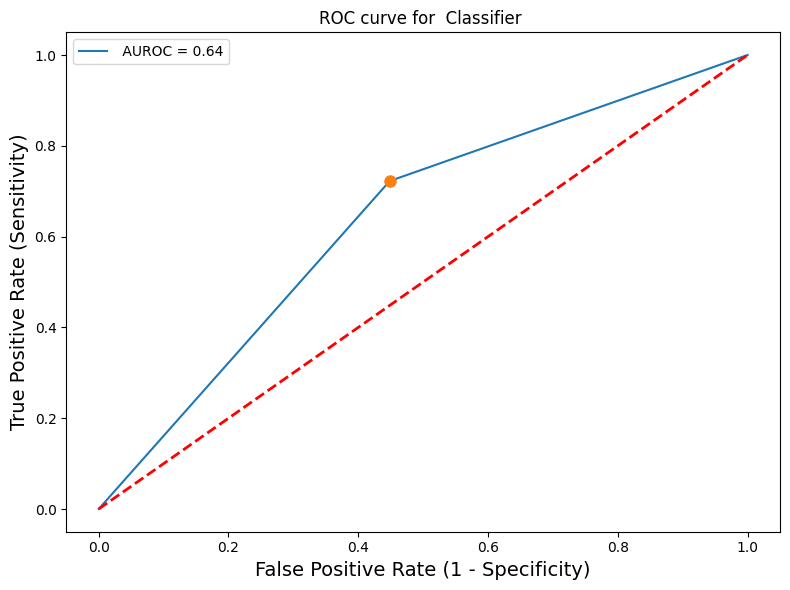

In [37]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test, clf_rf.predict(X_test))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

#XGBoost Classifer

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, xgb_clf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.76      0.50      0.60      4877
           1       0.63      0.84      0.72      4878

    accuracy                           0.67      9755
   macro avg       0.69      0.67      0.66      9755
weighted avg       0.69      0.67      0.66      9755



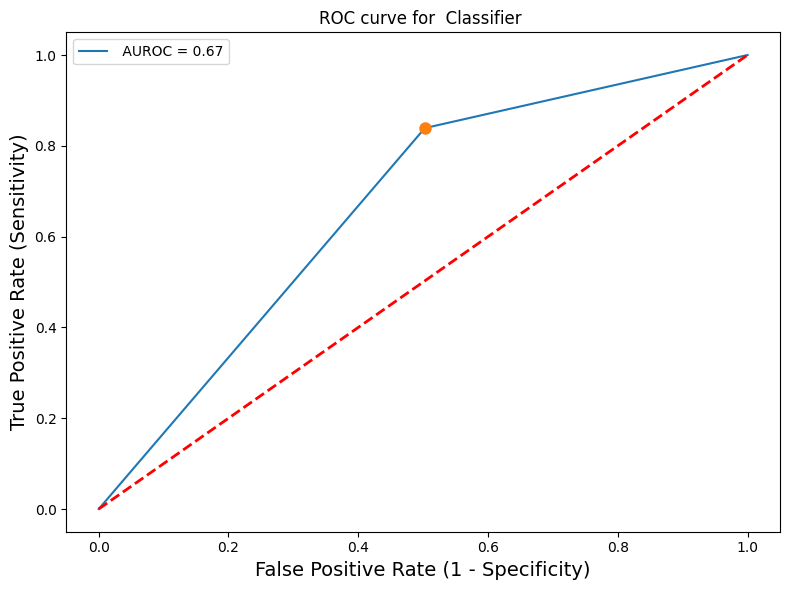

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test, xgb_clf.predict(X_test))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')



plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,Y_train)
    train_score.append(accuracy_score(Y_test, model.predict(X_test)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 64.61%


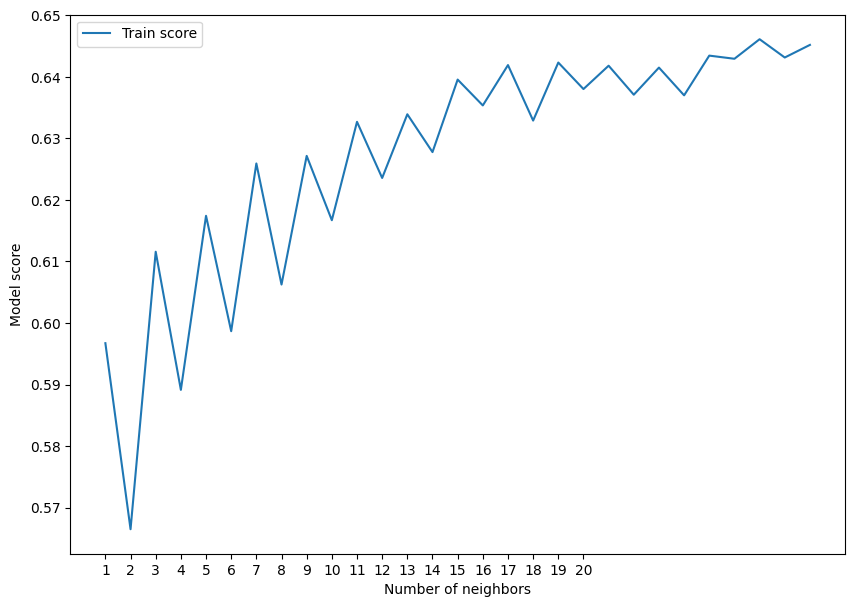

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=26)


In [ ]:
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=26)

In [ ]:
print(classification_report(Y_test, knn_clf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.67      0.56      0.61      4877
           1       0.62      0.73      0.67      4878

    accuracy                           0.64      9755
   macro avg       0.65      0.64      0.64      9755
weighted avg       0.65      0.64      0.64      9755



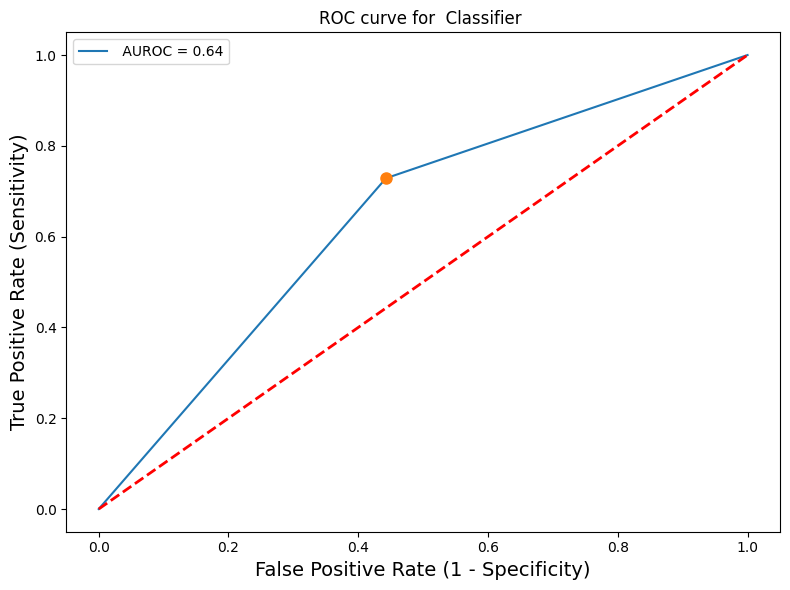

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test, knn_clf.predict(X_test))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, Y_train)

SVC(gamma=0.1)

In [ ]:
print(classification_report(Y_test, svm_clf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.80      0.42      0.55      4877
           1       0.61      0.90      0.72      4878

    accuracy                           0.66      9755
   macro avg       0.71      0.66      0.64      9755
weighted avg       0.71      0.66      0.64      9755



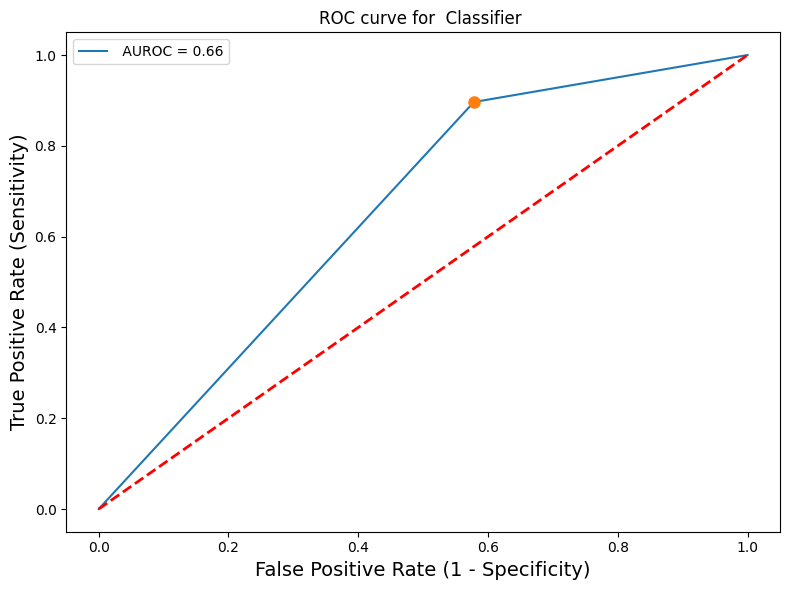

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test, svm_clf.predict(X_test))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

#Feature Importance

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

<Axes: >

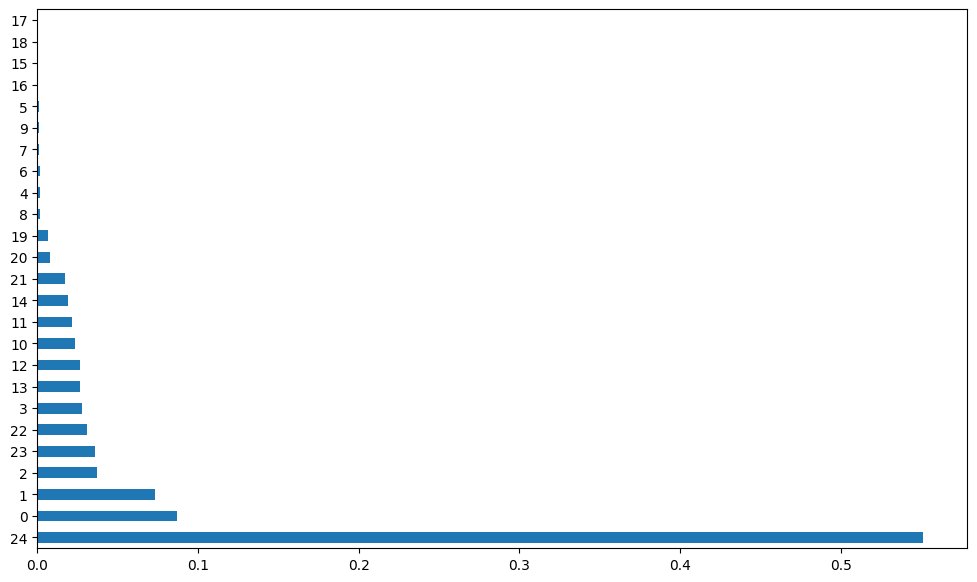

In [ ]:
feature_imp(X,clf_rf).plot(kind='barh', figsize=(12,7), legend=False)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64442 entries, 0 to 64441
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Patient Age at Treatment                             64442 non-null  float64
 1   Total Number of Previous IVF cycles                  64442 non-null  float64
 2   Total number of IVF pregnancies                      64442 non-null  float64
 3   Total number of live births - conceived through IVF  64442 non-null  float64
 4   Type of Infertility - Female Primary                 64442 non-null  float64
 5   Type of Infertility - Female Secondary               64442 non-null  float64
 6   Type of Infertility - Male Primary                   64442 non-null  float64
 7   Type of Infertility - Male Secondary                 64442 non-null  float64
 8   Type of Infertility -Couple Primary                  64442 non-nul